In [1]:
import glob
import pandas as pd
import numpy as np
from lxml import etree

data = {'full_text': [], 'classifier': [], 'publication_time': []}
for file in glob.glob('E:/Working/DataMining/homework/hw2/nyt_corpus/samples_500/*'):
    tree = etree.parse(file)
    root = tree.getroot()
    full_text = ''
    if root.find(".//block[@class='full_text']") is not None:
        for p in root.find(".//block[@class='full_text']"):
            full_text += p.text + '\n'
    else:
        full_text = None
    data['full_text'].append(full_text)

    classifier = set()
    for child in root.findall('.//classifier'):
        text = child.text.split('/')
        try:
            if (text[0] == 'Top' and (text[1] == 'Features' or text[1] == 'News')):
                classifier.add(text[2])
        except:
            continue
    if not classifier:
        classifier = None
    data['classifier'].append(classifier)
    data['publication_time'].append({'year': root.find(".//meta[@name='publication_year']").attrib['content'],
        'month': root.find(".//meta[@name='publication_month']").attrib['content'],
        'date': root.find(".//meta[@name='publication_day_of_month']").attrib['content']})

df = pd.DataFrame(data)
print(df)

                                         classifier  \
0                                    {U.S., Travel}   
1                                   {Travel, World}   
2                                          {Sports}   
3                             {Travel, World, Arts}   
4                                          {Travel}   
5                                        {Business}   
6                                   {Theater, Arts}   
7                             {Style, Health, Arts}   
8                                        {Business}   
9                                          {Sports}   
10                                       {Magazine}   
11                                         {Sports}   
12                                       {Business}   
13                                       {Business}   
14                   {U.S., Travel, World, Science}   
15          {Washington, Front Page, Travel, World}   
16                                           {Arts}   
17        

In [2]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

StopWords = stopwords.words("english")
stemmer = SnowballStemmer("english")
for i in range(df.iloc[:, 1].size):
    text = df.iloc[i , 1]
    if text is not None:
        text = re.sub(r'[{}0-9\n]+'.format(string.punctuation), ' ', text).lower()
        text = ' '.join([stemmer.stem(word) for word in text.split() if word not in StopWords])
        df.iloc[i , 1] = text.strip()
print(df)

                                         classifier  \
0                                    {U.S., Travel}   
1                                   {Travel, World}   
2                                          {Sports}   
3                             {Travel, World, Arts}   
4                                          {Travel}   
5                                        {Business}   
6                                   {Theater, Arts}   
7                             {Style, Health, Arts}   
8                                        {Business}   
9                                          {Sports}   
10                                       {Magazine}   
11                                         {Sports}   
12                                       {Business}   
13                                       {Business}   
14                   {U.S., Travel, World, Science}   
15          {Washington, Front Page, Travel, World}   
16                                           {Arts}   
17        

In [3]:
from sklearn.feature_extraction.text import CountVectorizer 

vectorizer = CountVectorizer() 
df['Bag_of_Words'] = None
texts = [i for i in df.iloc[:, 1] if i is not None]
vector_list = vectorizer.fit_transform(texts).todense()
print(vector_list.shape)
print(vectorizer.vocabulary_)
j = 0
for i in range(df.iloc[:, 1].size):
    if df.iloc[i, 1] is not None:
        df.iloc[i, 3] = vector_list[j]
        j += 1

print(df)

(495, 15103)
{'lead': 7437, 'congress': 2713, 'adjourn': 129, 'last': 7378, 'fall': 4571, 'john': 6889, 'riley': 11293, 'head': 5887, 'feder': 4654, 'railroad': 10767, 'administr': 133, 'start': 12764, 'polish': 10226, 'resum': 11183, 'began': 1168, 'look': 7751, 'forward': 4990, 'leav': 7459, 'govern': 5499, 'earli': 3944, 'year': 14986, 'three': 13522, 'half': 5726, 'helm': 5958, 'agenc': 205, 'mr': 8777, 'negoti': 8994, 'sale': 11583, 'two': 13922, 'small': 12374, 'properti': 10545, 'own': 9607, 'carri': 1997, 'flag': 4815, 'reagan': 10870, 'bitter': 1352, 'battl': 1102, 'conrail': 2730, 'giant': 5317, 'philadelphia': 9997, 'base': 1071, 'freight': 5054, 'carrier': 1999, 'help': 5960, 'block': 1400, 'congression': 2714, 'adopt': 141, 'legisl': 7493, 'would': 14920, 'restor': 11175, 'regul': 11014, 'rate': 10827, 'expand': 4463, 'layoff': 7425, 'benefit': 1215, 'rail': 10766, 'worker': 14896, 'draft': 3806, 'long': 7741, 'await': 885, 'rule': 11499, 'aim': 237, 'curb': 3100, 'alcohol

                                         classifier  \
0                                    {U.S., Travel}   
1                                   {Travel, World}   
2                                          {Sports}   
3                             {Travel, World, Arts}   
4                                          {Travel}   
5                                        {Business}   
6                                   {Theater, Arts}   
7                             {Style, Health, Arts}   
8                                        {Business}   
9                                          {Sports}   
10                                       {Magazine}   
11                                         {Sports}   
12                                       {Business}   
13                                       {Business}   
14                   {U.S., Travel, World, Science}   
15          {Washington, Front Page, Travel, World}   
16                                           {Arts}   
17        

In [4]:
from wordcloud import WordCloud,ImageColorGenerator
import  matplotlib.pyplot as plt
from scipy.misc import imread
import jieba
import jieba.analyse

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.520 seconds.
Prefix dict has been built succesfully.


said mr year new would state compani like time two also last peopl work say american york first nation percent school make unit go day mani million includ presid even use get citi could three call report today street offici may month offic share govern way hous ms open sale much made week center law group univers long world countri lead public tax run come still take old back chang art program sinc want plan right famili play look live part high well seem life dr book anoth place need end home recent sever director market think point game yesterday


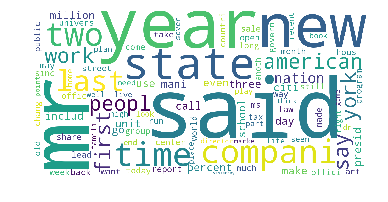

In [5]:
text_all = ''
for i in df.iloc[:, 1]:
    if i is not None:
        text_all += i + ' '
tags = jieba.analyse.extract_tags(text_all, topK=100, withWeight=False)
text =" ".join(tags)
print(text)
wordcloud=WordCloud(background_color='white',scale=3.5).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

length: 2 number:120
length: 3 number:618
length: 4 number:1948
length: 5 number:2798
length: 6 number:3177
length: 7 number:2651
length: 8 number:1730
length: 9 number:1013
length: 10 number:573
length: 11 number:241
length: 12 number:128
length: 13 number:60
length: 14 number:27
length: 15 number:9
length: 16 number:6
length: 17 number:1
length: 18 number:2
length: 19 number:1


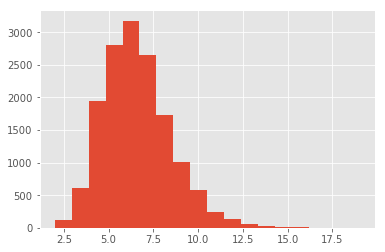

In [6]:
length_list = [len(i) for i in vectorizer.vocabulary_.keys()]
length_set = set(length_list)
for item in length_set:
    print("length: %d number:%d" %(item, length_list.count(item)))
plt.style.use( 'ggplot') 
plt.hist(length_list, 18)
plt.show()

In [7]:
word_count_list = [len(i.split()) for i in df.iloc[:, 1] if i is not None]
word_count_set = set(word_count_list)
text_count = [word_count_list.count(i) for i in word_count_set]
print(sorted(word_count_set))
print(text_count)
print(len(text_count))

[3, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 85, 86, 87, 88, 91, 92, 93, 94, 97, 99, 101, 104, 105, 106, 107, 108, 109, 110, 112, 114, 116, 117, 118, 119, 121, 124, 125, 129, 131, 134, 135, 136, 137, 139, 141, 142, 144, 151, 152, 154, 156, 157, 158, 159, 161, 162, 163, 167, 172, 175, 181, 182, 185, 187, 188, 191, 194, 195, 196, 198, 203, 205, 206, 211, 214, 216, 218, 223, 224, 228, 229, 230, 233, 235, 236, 237, 238, 240, 241, 245, 250, 251, 252, 261, 263, 267, 268, 273, 281, 283, 290, 291, 292, 293, 294, 300, 302, 305, 308, 312, 313, 315, 318, 319, 321, 327, 328, 333, 335, 336, 341, 344, 346, 347, 352, 353, 354, 358, 361, 362, 363, 364, 370, 372, 373, 374, 375, 377, 380, 382, 385, 389, 392, 393, 395, 396, 399, 400, 409, 410, 412, 414, 415, 416, 417, 420, 422, 425, 426, 

[270, 142, 57, 17, 3, 2, 2, 1, 0, 1]


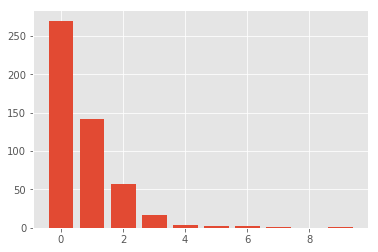

In [8]:
width_division = [0] * 10
for j, i in enumerate(word_count_set):
    width_division[int((i - 3) / 273.1)] += text_count[j]
print(width_division)
plt.bar(left = np.arange(10), height = width_division)
plt.show()

[64, 70, 60, 44, 43, 44, 40, 44, 45, 41]


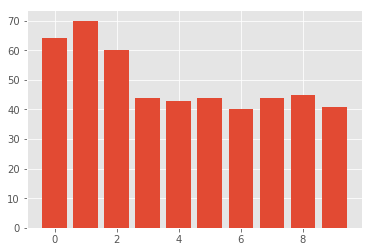

In [9]:
depth_division = [0] * 10
for i in range(len(word_count_set)):
    depth_division[int(i / 34)] += text_count[i]
print(depth_division)
plt.bar(left = np.arange(10), height = depth_division)
plt.show()

{'U.S.': 77, 'Travel': 210, 'World': 66, 'Sports': 40, 'Arts': 56, 'Business': 96, 'Theater': 4, 'Style': 32, 'Health': 32, 'Magazine': 11, 'Science': 17, 'Washington': 28, 'Front Page': 13, 'Home and Garden': 9, 'Week in Review': 4, 'Books': 16, 'New York and Region': 85, 'Corrections': 23, 'Technology': 13, 'Education': 12, 'Movies': 9, 'Obituaries': 11, 'Dining and Wine': 5}


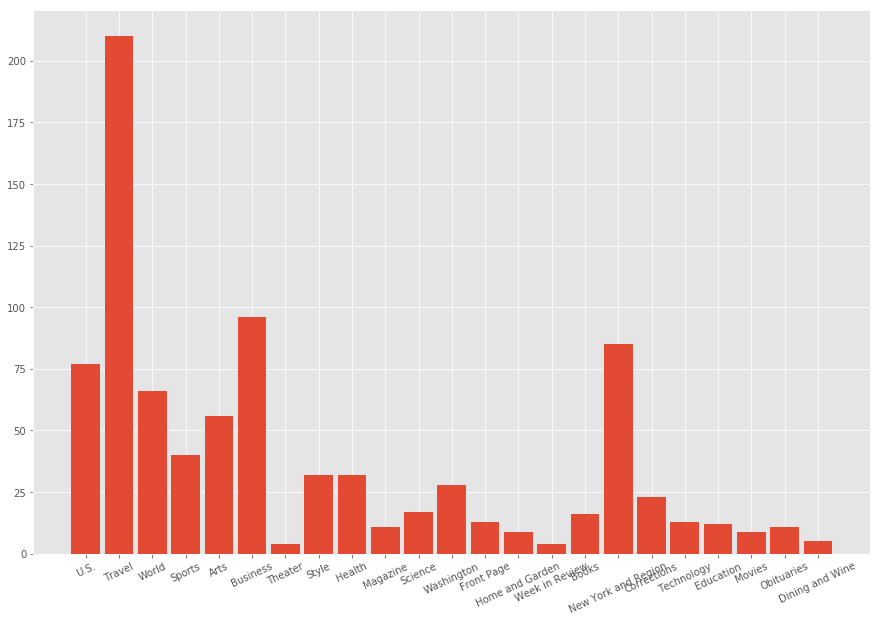

In [10]:
class_number = {}
for i in df.iloc[:, 0]:
    if i is not None:
        for j in i:
            if j in class_number:
                class_number[j] += 1
            else:
                class_number[j] = 1
print(class_number)
plt.figure(figsize=(15,10))
plt.bar(left = np.linspace(0,23,23), height = class_number.values(), align='center',width = 0.9)
plt.xticks(np.linspace(0,23,23),class_number.keys(),rotation=25)
plt.show()

{1: 37, 2: 41, 3: 47, 4: 40, 5: 58, 6: 32, 7: 43, 8: 41, 9: 44, 10: 51, 11: 26, 12: 40}


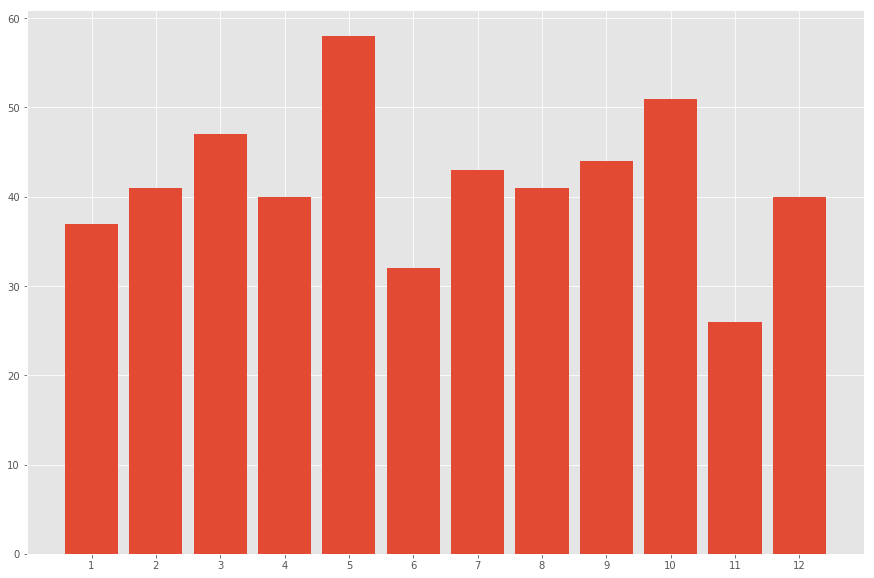

In [11]:
month_number = {i: 0 for i in range(1, 13)}
for i in df.iloc[:, 2]:
    month_number[int(i['month'])] += 1
print(month_number)
plt.figure(figsize=(15,10))
plt.bar(left = np.linspace(0,12,12), height = month_number.values(), align='center',width = 0.9)
plt.xticks(np.linspace(0,12,12),month_number.keys())
plt.show()